In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from google.colab import files
uploaded=files.upload()

Saving cleaned.csv to cleaned.csv


In [28]:
df=pd.read_csv("cleaned.csv")
df

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

,Accident_severity
count,12316.000000
mean,1.832819
std,0.406082
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


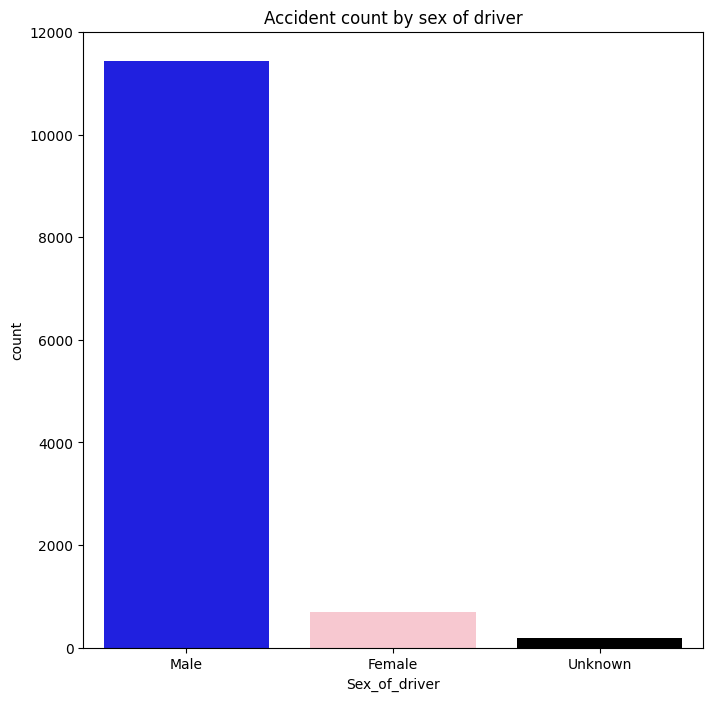

In [31]:
plt.figure(figsize=(8,8))
custom_palette = {'Male': 'blue', 'Female': 'pink', 'Unknown': 'black'}
sns.countplot(x='Sex_of_driver',data=df,palette=custom_palette)
plt.title("Accident count by sex of driver")
plt.show()

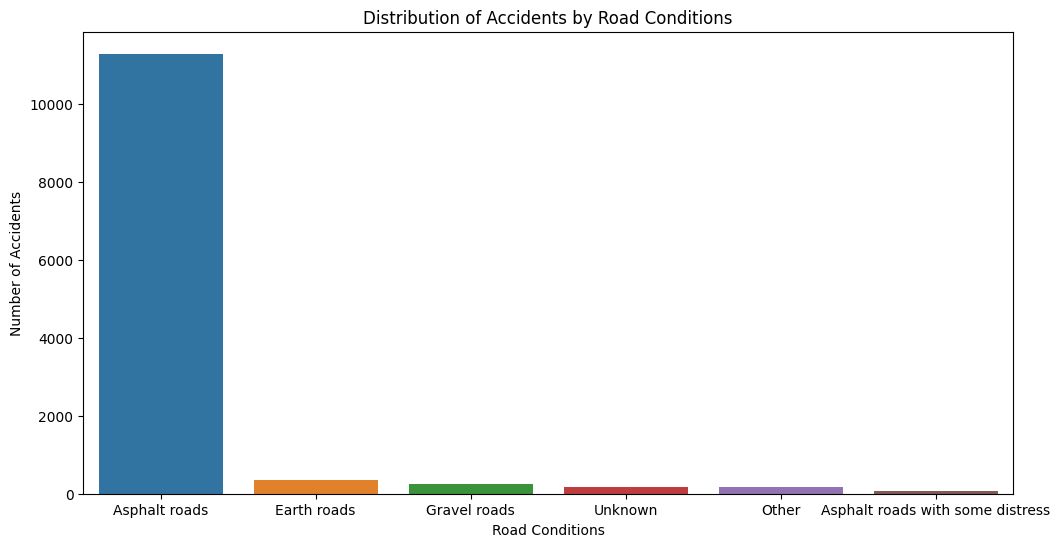

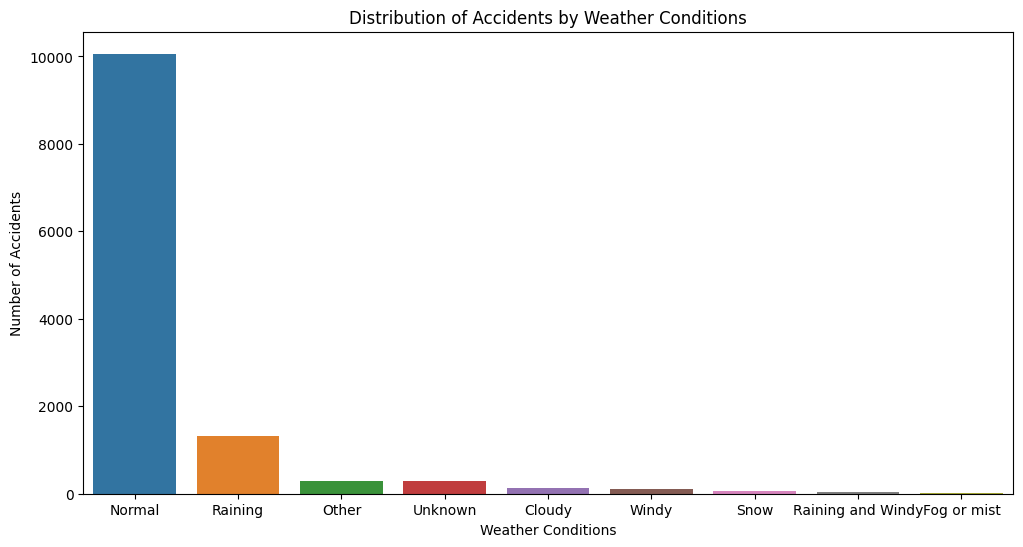

In [22]:
# Road and Weather Conditions Analysis
road_condition_counts = df['Road_surface_type'].value_counts()
weather_condition_counts = df['Weather_conditions'].value_counts()


#Road Conditions
plt.figure(figsize=(12, 6))
sns.barplot(x=road_condition_counts.index, y=road_condition_counts.values)
plt.title('Distribution of Accidents by Road Conditions')
plt.xlabel('Road Conditions')
plt.ylabel('Number of Accidents')
plt.show()

#Weather Conditions
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_condition_counts.index, y=weather_condition_counts.values)
plt.title('Distribution of Accidents by Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Accidents')
plt.show()



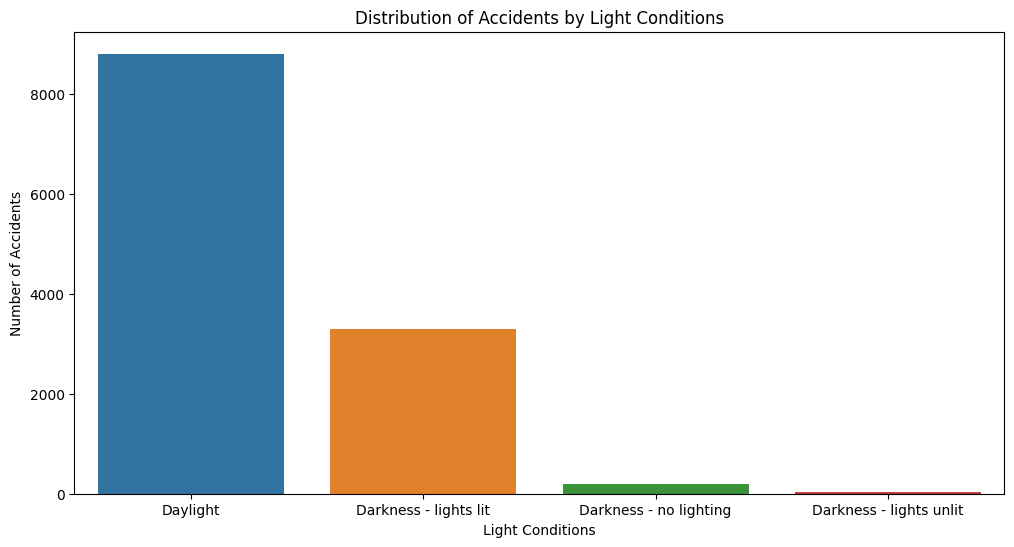

In [21]:
light_conditions_counts = df['Light_conditions'].value_counts()

# Light Conditions
plt.figure(figsize=(12, 6))
sns.barplot(x=light_conditions_counts.index, y=light_conditions_counts.values)
plt.title('Distribution of Accidents by Light Conditions')
plt.xlabel('Light Conditions')
plt.ylabel('Number of Accidents')
plt.show()


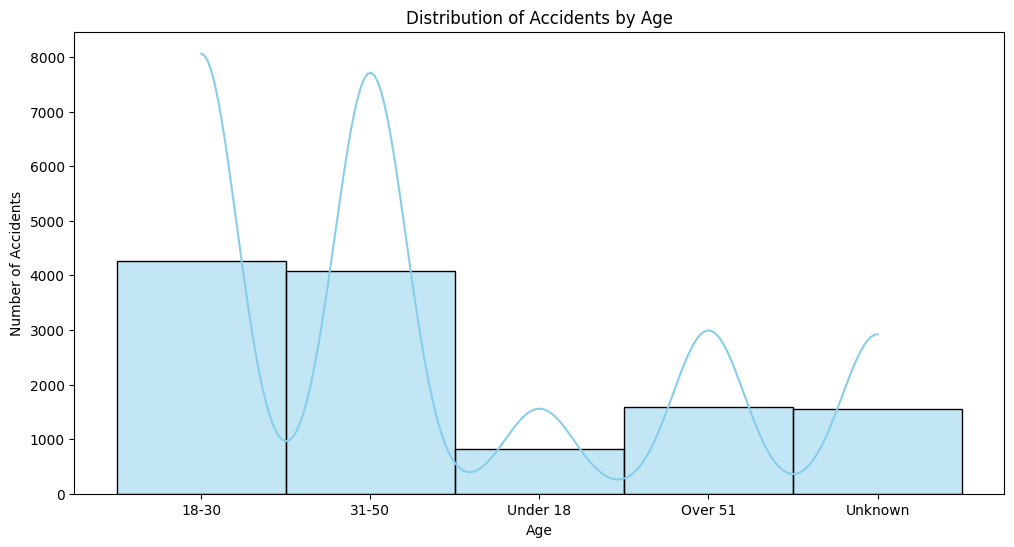

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.histplot(df['Age_band_of_driver'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Accidents by Age')
plt.xlabel('Age')
plt.ylabel('Number of Accidents')
plt.show()

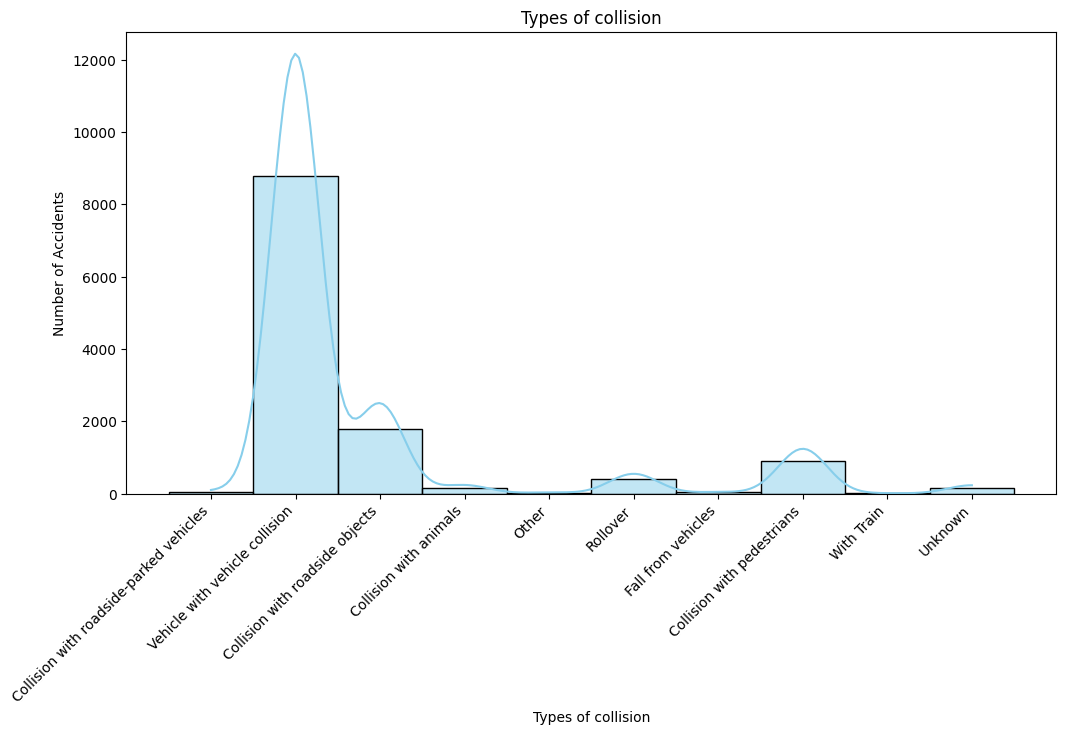

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.histplot(df['Type_of_collision'], bins=20, kde=True, color='skyblue')
plt.title('Types of collision')
plt.xlabel('Types of collision')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

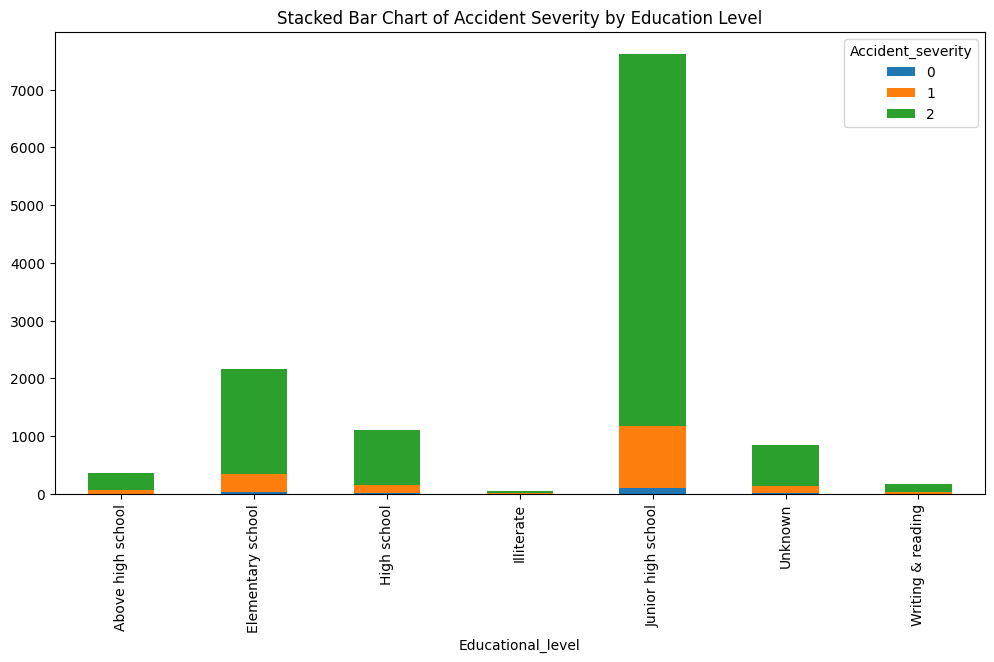

In [10]:
contingency_table = pd.crosstab(df['Educational_level'], df['Accident_severity'])
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Stacked Bar Chart of Accident Severity by Education Level')
plt.show()

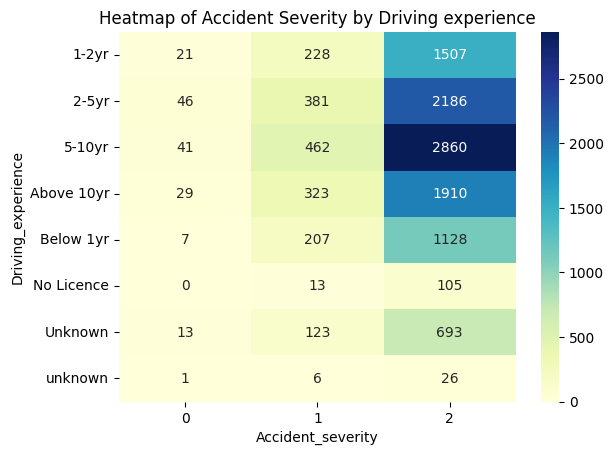

In [32]:
contingency_table = pd.crosstab(df['Driving_experience'], df['Accident_severity'])
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Accident Severity by Driving experience')
plt.show()

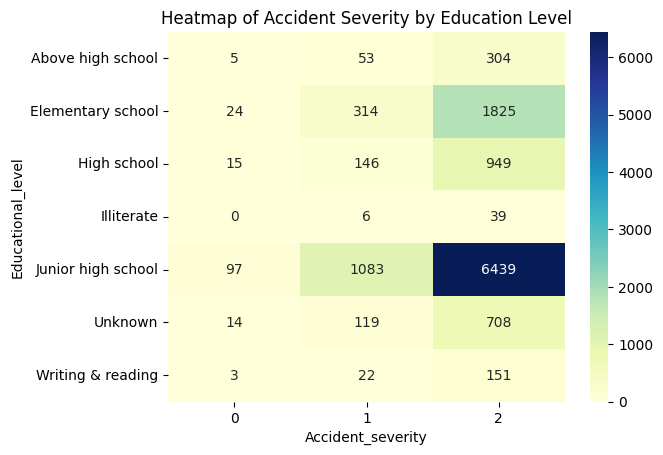

In [12]:
contingency_table = pd.crosstab(df['Educational_level'], df['Accident_severity'])
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Accident Severity by Education Level')
plt.show()

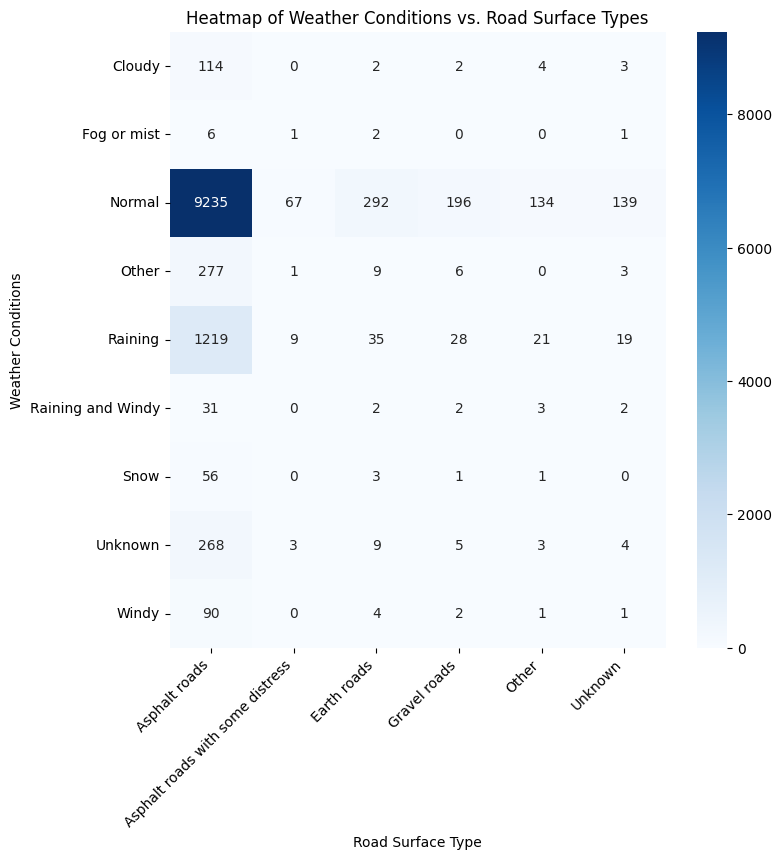

In [35]:
# Weather and Road Surface Heatmap
weather_road_heatmap = df.pivot_table(index='Weather_conditions', columns='Road_surface_type', aggfunc='size', fill_value=0)
plt.figure(figsize=(8, 8))
sns.heatmap(weather_road_heatmap, cmap='Blues', annot=True, fmt='d')
plt.title('Heatmap of Weather Conditions vs. Road Surface Types')
plt.xlabel('Road Surface Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Weather Conditions')
plt.show()

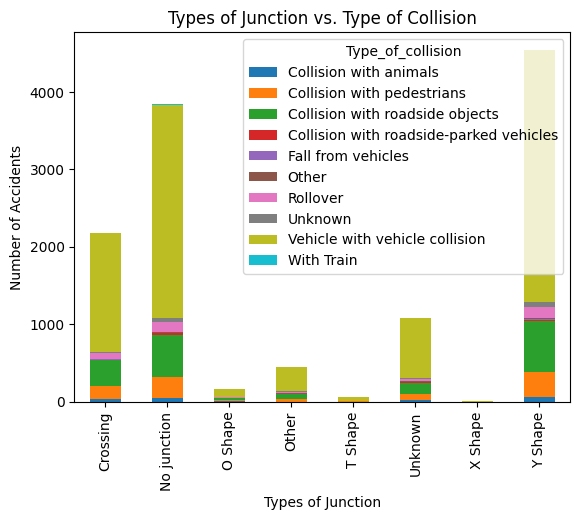

In [30]:
# Junction Types vs. Collision Types Radar Chart
junction_collision_radar = df.groupby('Types_of_Junction')['Type_of_collision'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Types of Junction vs. Type of Collision')
plt.xlabel('Types of Junction')
plt.ylabel('Number of Accidents')
plt.show()

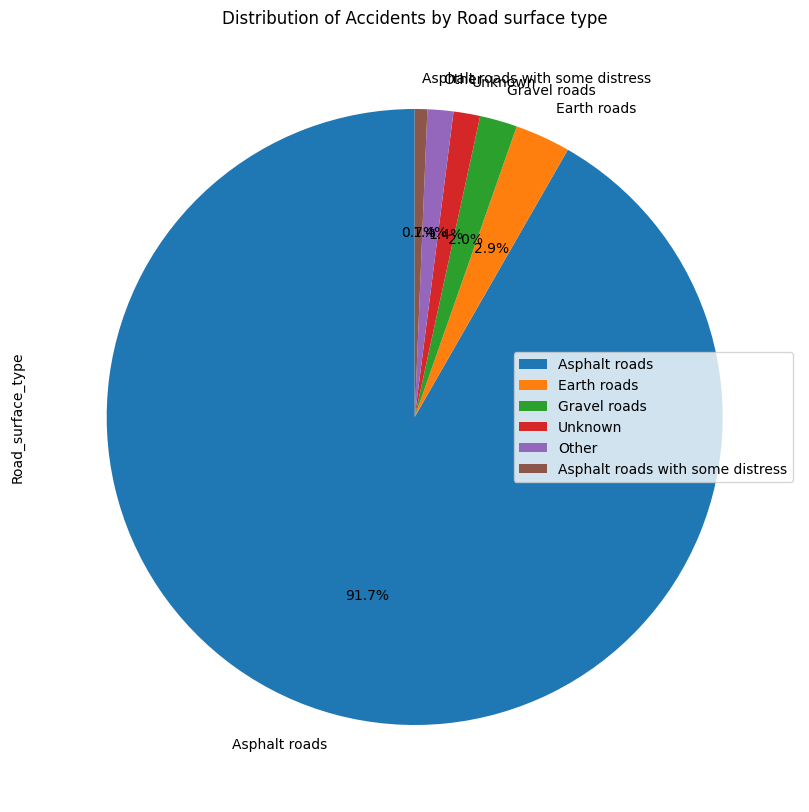

In [37]:
plt.figure(figsize=(18, 10))

df['Road_surface_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Accidents by Road surface type')
plt.legend(labels=df['Road_surface_type'].value_counts().index, loc='right')

plt.show()

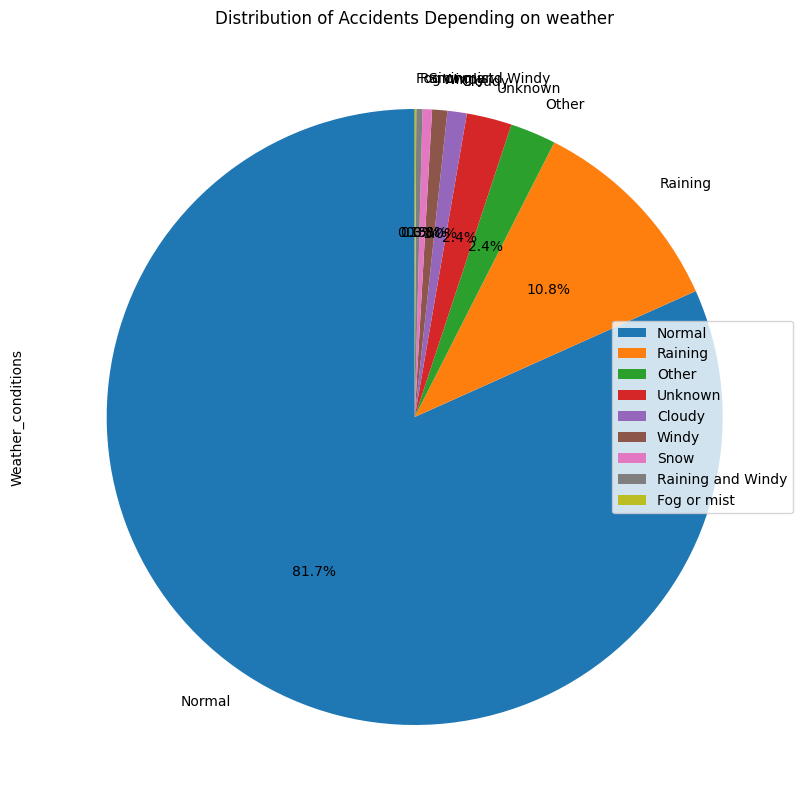

In [14]:
plt.figure(figsize=(18, 10))
df['Weather_conditions'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Accidents Depending on weather')
plt.legend(labels=df['Weather_conditions'].value_counts().index, loc='right')

plt.show()

<ipython-input-15-8eebdf2a5529>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


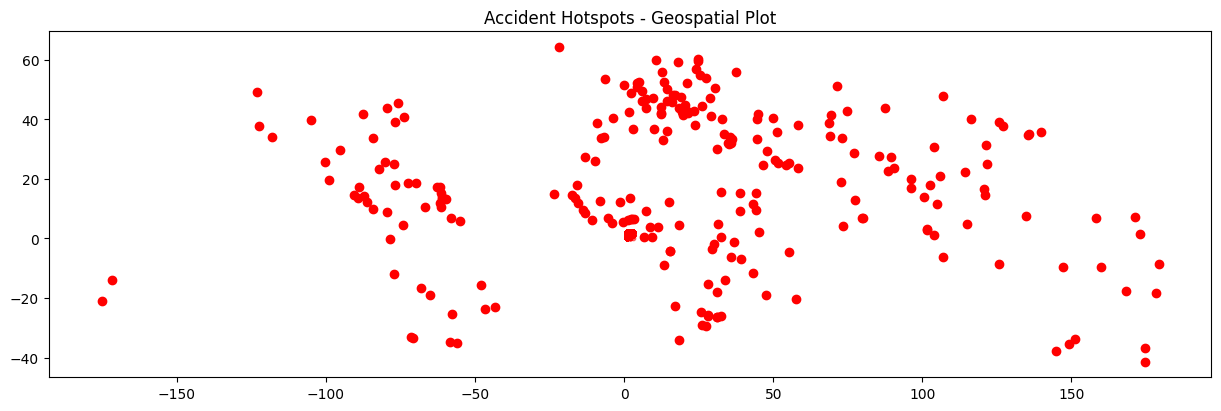

In [15]:
import geopandas as gpd
from shapely.geometry import Point



stage_mapping = {'Male': 1, 'Female': 2, 'Unknown': 3}  # Adjust as needed

df['Sex_of_driver'] = df['Sex_of_driver'].map(stage_mapping)



geometry = [Point(xy) for xy in zip(df['Sex_of_driver'], df['Accident_severity'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = world.plot(figsize=(15, 10), color='red')

gdf.plot(ax=ax, color='red', markersize=10, alpha=0.5)
plt.title('Accident Hotspots - Geospatial Plot')
plt.show()

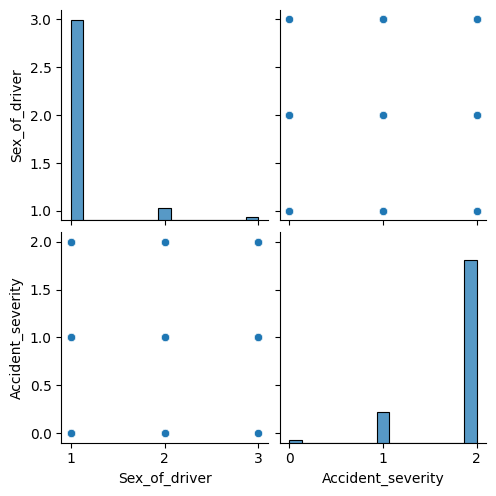

In [16]:
import seaborn as sns
sns.pairplot(df, markers='o')
plt.show()

<ipython-input-17-3cf19524b014>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


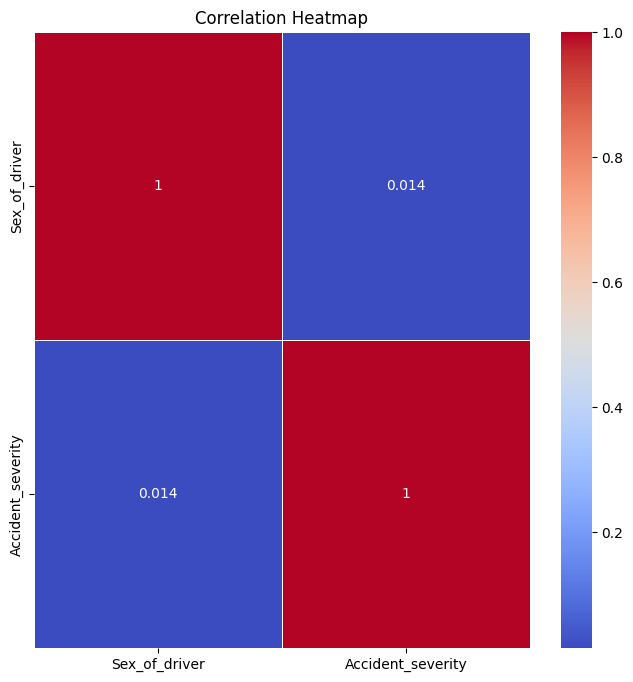

In [17]:
# Correlation Heatmap
plt.figure(figsize=(8, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()